In [2]:
using JuMP
using GLPK

## Q1
Solve the following linear programme using Simplex algorithm. Show the intermediate steps in the form of either the tableau or the dictionary. For each intermediate tableau/dictionary, identify the corresponding basic feasible solution.
$$Maximise: \ x_1 + 3 x_2 $$

<div style="text-align: center"> Subject to constraint: </div>

$$x_1 + x_2 \leq 6$$
$$-x_1 + 2 x_2 \leq 8$$

$$x_1, x_2 \ge 0$$

In [3]:
model = Model(GLPK.Optimizer)
@variable(model, x1 >= 0)
@variable(model, x2 >= 0)
@constraint(model, x1 + x2 <= 6)
@constraint(model, -x1 + 2 * x2 <= 8)
@objective(model, Max, x1 + 3 * x2)
optimize!(model)
println("x1 =", value(x1))
println("x2 =", value(x2))
println("optimal =", objective_value(model))

x1 =1.3333333333333333
x2 =4.666666666666667
optimal =15.333333333333334


Convert to equations:

$$ x_1 + x_2 + s_1 = 6 $$
$$ -x_1 + 2x_2 + s_2 = 8 $$
$$ x_1 + 3x_2 = z $$

Construct the tableau A:

| $$x_1$$ | $$x_2$$ | $$s_1$$ | $$s_2$$ | $$z$$ | |
|----|----|----|----|---|--|
| 1 | 1 | 1 | 0 | 0 | 6 |
| -1 | <span style="color:red">2</span> | 0 | 1 | 0 | 8 |
| -1 | -3 | 0 | 0 | 1 | 0 |

The pivot has <b style="color:red">red</b> color. Transform A by $A_2 = \frac{1}{2}A_2$

| $$x_1$$ | $$x_2$$ | $$s_1$$ | $$s_2$$ | $$z$$ | |
|----|----|----|----|---|--|
| 1 | 1 | 1 | 0 | 0 | 6 |
| $\frac{-1}{2}$ | $\color{red}1$ | 0 | 1/2 | 0 | 4 |
| -1 | -3 | 0 | 0 | 1 | 0 |

Transform A by $A_1 = \frac{1}{2} A_1 + A_2$ and $A_3 = A_3 + 3A_2$

| $$x_1$$ | $$x_2$$ | $$s_1$$ | $$s_2$$ | $$z$$ | |
|----|----|----|----|---|--|
| $\frac{3}{2}$ | 0 | 1 | $\frac{-1}{2}$ | 0 | 2 |
| $\frac{-1}{2}$ | 1 | 0 | 1/2 | 0 | 4 |
| $\frac{-5}{2}$ | 0 | 0 | $\frac{3}{2}$ | 1 | 12 |

Transform A by $A_2 = -A_2$. By ratio test, we identify the pivot is at $A_{1,1}$

| $$x_1$$ | $$x_2$$ | $$s_1$$ | $$s_2$$ | $$z$$ | |
|----|----|----|----|---|--|
| $\color{red}\frac{3}{2}$ | 0 | 1 | $\frac{-1}{2}$ | 0 | 2 |
| $\frac{1}{2}$ | -1 | 0 | -1/2 | 0 | -4 |
| $\frac{-5}{2}$ | 0 | 0 | $\frac{3}{2}$ | 1 | 12 |

Transform A by $A_1 = \frac{2}{3} A_1$

| $$x_1$$ | $$x_2$$ | $$s_1$$ | $$s_2$$ | $$z$$ | |
|----|----|----|----|---|--|
| $\color{red}1$ | 0 | $\frac{2}{3}$ | $\frac{-1}{3}$ | 0 | $\frac{4}{3}$ |
| $\frac{1}{2}$ | -1 | 0 | -1/2 | 0 | -4 |
| $\frac{-5}{2}$ | 0 | 0 | $\frac{3}{2}$ | 1 | 12 |

Transform A by $A_2 = A_2 - \frac{1}{2} A_1$ and $A_3 = A_3 + \frac{5}{2}A_1$

| $$x_1$$ | $$x_2$$ | $$s_1$$ | $$s_2$$ | $$z$$ | |
|----|----|----|----|---|--|
| $\color{red}1$ | 0 | $\frac{3}{2}$ | $\frac{-1}{3}$ | 0 | $\frac{4}{3}$ |
| 0 | 1 | $\frac{1}{3}$ | $\frac{1}{3}$ | 0 | $\frac{14}{3}$ |
| 0 | 0 | $\frac{5}{3}$ | $\frac{2}{3}$ | 1 | $\frac{46}{3}$ |



## Q2
Suppose a company manufactures table and chairs made from either pine or oak. An oak table requires 17 units of oak wood and an oak chair requires 5 units of oak to make. A pine table and chair require respectively 30 and 1 unit of pine. The company has available 150 units of oak and 210 units of pine for this week. If the profit on every table sold is £40 and that of every chair is £15, how many tables and chairs of each type should the company manufacture this week (assuming the company expects to be able to sell every table and chair that it makes)?<br>
(i) Write down the problem as a linear programming problem in canonical form, indicating clearly what are the decision variables, objective function and constraints.<br>
(ii) Use the simplex tableaux method to compute an optimal solution to the problem.

Let $x_1$, $x_2$, $x_3$, and $x_4$ be decision variables, representing the number of pine table, pine chair, oaken table and oaken chair respectively.

Maximize: $$ {40 (x_1 + x_3) + 15 (x_2 + x_4)} $$

Subject to: $$ 30 x_1 + 1 x_2 \le 210$$
$$17 x_3 + 5 x_4 \le 150$$
$$ x_1, x_2, x_3, x_4 \ge 0 $$

Here are the simplex tableaux you provided, now rendered as LaTeX tables. Each table is formatted for direct inclusion in LaTeX documents.

### Tableau 1

The pivot is in cell (1, 1)
$$
\begin{array}{cccccccc}
x_1 & x_2 & x_3 & x_4 & s_1 & s_2 & z & \text{RHS} \\
\color{red}30 & 1 & 0 & 0 & 1 & 0 & 0 & 120 \\
0 & 0 & 17 & 5 & 0 & 1 & 0 & 150 \\
-40 & -15 & -40 & -15 & 0 & 0 & 1 & 0 \\
\end{array}
$$

***

### Tableau 2

Obtained from Tableau 1 by $A_1 = \frac{A_1}{30}$ and $A_3 = A_3 + 40 * A_1$

$$
\begin{array}{cccccccc}
x_1 & x_2 & x_3 & x_4 & s_1 & s_2 & z & \text{RHS} \\
\color{red}1 & \frac{1}{30} & 0 & 0 & \frac{1}{30} & 0 & 0 & 4 \\
0 & 0 & 17 & 5 & 0 & 1 & 0 & 150 \\
0 & -13\,\frac{2}{3} & -40 & -15 & 1 & \frac{1}{3} & 0 & 160 \\
\end{array}
$$

***

### Tableau 3

The pivot is in cell (2, 3)

$$
\begin{array}{cccccccc}
x_1 & x_2 & x_3 & x_4 & s_1 & s_2 & z & \text{RHS} \\
1 & \frac{1}{30} & 0 & 0 & \frac{1}{30} & 0 & 0 & 4 \\
0 & 0 & \color{red}17 & 5 & 0 & 1 & 0 & 150 \\
0 & -13\,\frac{2}{3} & -40 & -15 & 1 & \frac{1}{3} & 0 & 160 \\
\end{array}
$$

***

### Tableau 4

Obtained from tableau 3 by $A_2 = \frac{A_2}{17}$ and $A_3 = A_3 + 40 * A_2$

$$
\begin{array}{cccccccc}
x_1 & x_2 & x_3 & x_4 & s_1 & s_2 & z & \text{RHS} \\
1 & \frac{1}{30} & 0 & 0 & \frac{1}{30} & 0 & 0 & 4 \\
0 & 0 & 1 & \frac{5}{17} & 0 & \frac{1}{17} & 0 & 8\,\frac{14}{17} \\
0 & -13\,\frac{2}{3} & 0 & -3\,\frac{4}{17} & 1 & \frac{1}{3} & 2\,\frac{6}{17} & 512\,\frac{16}{17} \\
\end{array}
$$

Note that this problem has four variables but only fewer constraints than necessary to determine optimal solution.

## Q3
Network-Flow Problem. Given a directed graph $G=(V,E)$, where each edge $e$ is associated with its capacity $c(e)>0$ and two special nodes source $s$ and sink $t$ are given $(s \neq t)$, the network flow problem is to find the maximum amount of flow from $s$ to $t$ subject to two constraints:<br>
Flow on edge $e$ doesn’t exceed $c(e)$<br> 
For every node $v\neq \{s,t\}$, incoming flow is equal to outgoing flow<br>
For the instance below, solve the network flow problem by formulating it as a linear program and then solving it using Julia/JuMP.

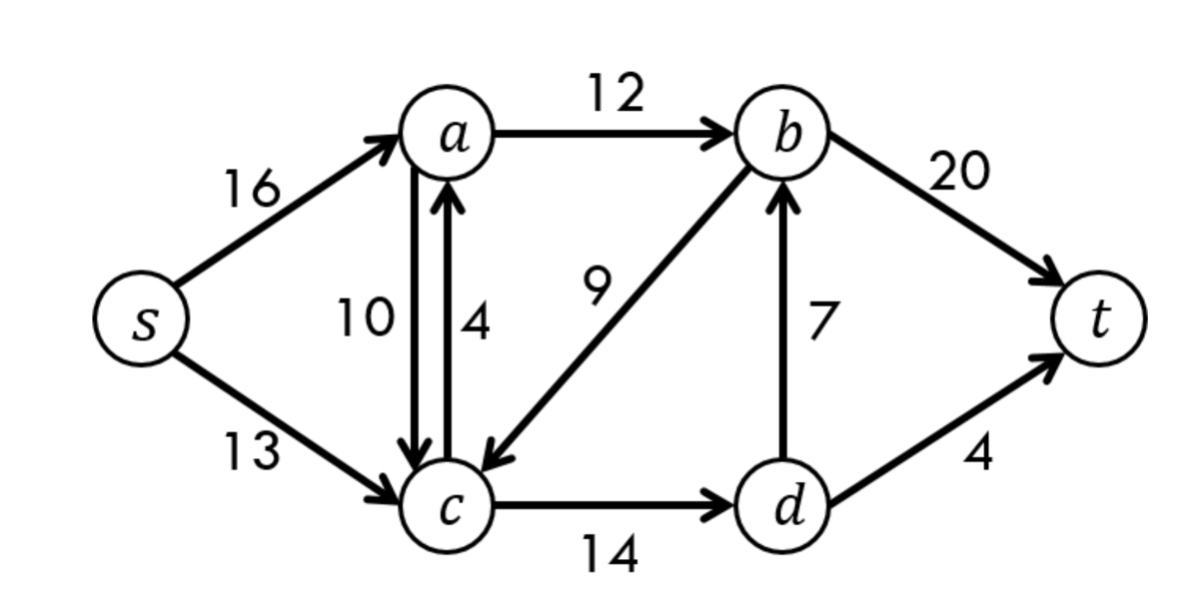

Let the decision variables represent the flow through each edge:

\begin{aligned}
& sa, sc, ac, ab, ca, cd, bc, bt, db, dt \geq 0
\end{aligned}

\begin{aligned}
\text{Maximize: } & \quad z = sa + sc \\
\text{Subject to: } & \quad sa + ca - ac - ab = 0, \\
& \quad sc + ac + bc - ca - cd = 0, \\
& \quad ab + db - bc - bt = 0, \\
& \quad cd - db - dt = 0, \\
& \quad 0 \leq sa \leq 16, \quad 0 \leq sc \leq 13, \quad 0 \leq ac \leq 10, \\
& \quad 0 \leq ab \leq 12, \quad 0 \leq ca \leq 4, \quad 0 \leq cd \leq 14, \\
& \quad 0 \leq bc \leq 9, \quad 0 \leq bt \leq 20, \quad 0 \leq db \leq 7, \quad 0 \leq dt \leq 4.
\end{aligned}


In [8]:
model = Model(GLPK.Optimizer)
@variable(model, 0 <= sa <= 16)
@variable(model, 0 <= sc <= 13)
@variable(model, 0 <= ac <= 10)
@variable(model, 0 <= ab <= 12)
@variable(model, 0 <= ca <= 4)
@variable(model, 0 <= cd <= 14)
@variable(model, 0 <= bc <= 9)
@variable(model, 0 <= bt <= 20)
@variable(model, 0 <= db <= 7)
@variable(model, 0 <= dt <= 4)
@constraint(model, sa + ca == ac + ab)
@constraint(model, sc + ac + bc == ca + cd)
@constraint(model, ab + db == bc + bt)
@constraint(model, cd == db + dt)
@objective(model, Max, sa + sc)
optimize!(model)
println("Flow through sa is ", value(sa),"/16")
println("Flow through sc is ", value(sc),"/13")
println("Flow through ac is ", value(ac),"/10")
println("Flow through ab is ", value(ab),"/12")
println("Flow through ca is ", value(ca),"/4")
println("Flow through cd is ", value(cd),"/14")
println("Flow through bc is ", value(bc),"/9")
println("Flow through bt is ", value(bt),"/20")
println("Flow through db is ", value(db),"/7")
println("Flow through dt is ", value(dt),"/4")
println("Max flow = ", objective_value(model))

Flow through sa is 12.0/16
Flow through sc is 11.0/13
Flow through ac is 0.0/10
Flow through ab is 12.0/12
Flow through ca is 0.0/4
Flow through cd is 11.0/14
Flow through bc is 0.0/9
Flow through bt is 19.0/20
Flow through db is 7.0/7
Flow through dt is 4.0/4
Max flow = 23.0


## Q4
 The ice cream manufacturer Icicle Works Ltd. needs to set up a production plan for the next year. Based on history, extensive surveys, and bird observations, the marketing department has come up with the following prediction of monthly sales of ice cream in the next year.<br>
 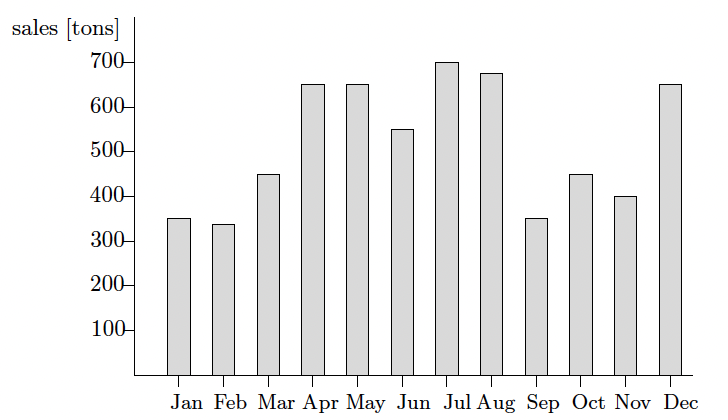
However,  a  change in the produced amount from month to month has significant costs: Temporary workers have to be hired or laid off, machines have to be adjusted, and so on. On the other hand,  generating a flat amount each month and storing the ice cream also has a significant cost.<br>
You start with no stored ice-cream at the beginning of the year and you would like to leave no stored ice-cream at the end of the year. You have to meet the demand for each month.<br>
Assume that changing the production by 1 ton from month i-1 to i cost 50 Euros a month and that storage facilities for 1 ton of ice-cream cost 20 Euros per month.<br>
 (a)  Write an LP formulation to determine what is the amount of ice cream the company should make each month and how much ice cream it needs to store each month to minimize its total cost.<br>
 (b)  Write a  code that given a  demand vector,  computes the optimal amount of ice cream to make each month by using some solver with Julia/JuMP. You can use the demand vector for the 12 months to be $d = [350\ 340\ 450\ 650\  650\ 550\ 700\ 675\ 350\ 425\ 400\ 650]$